   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


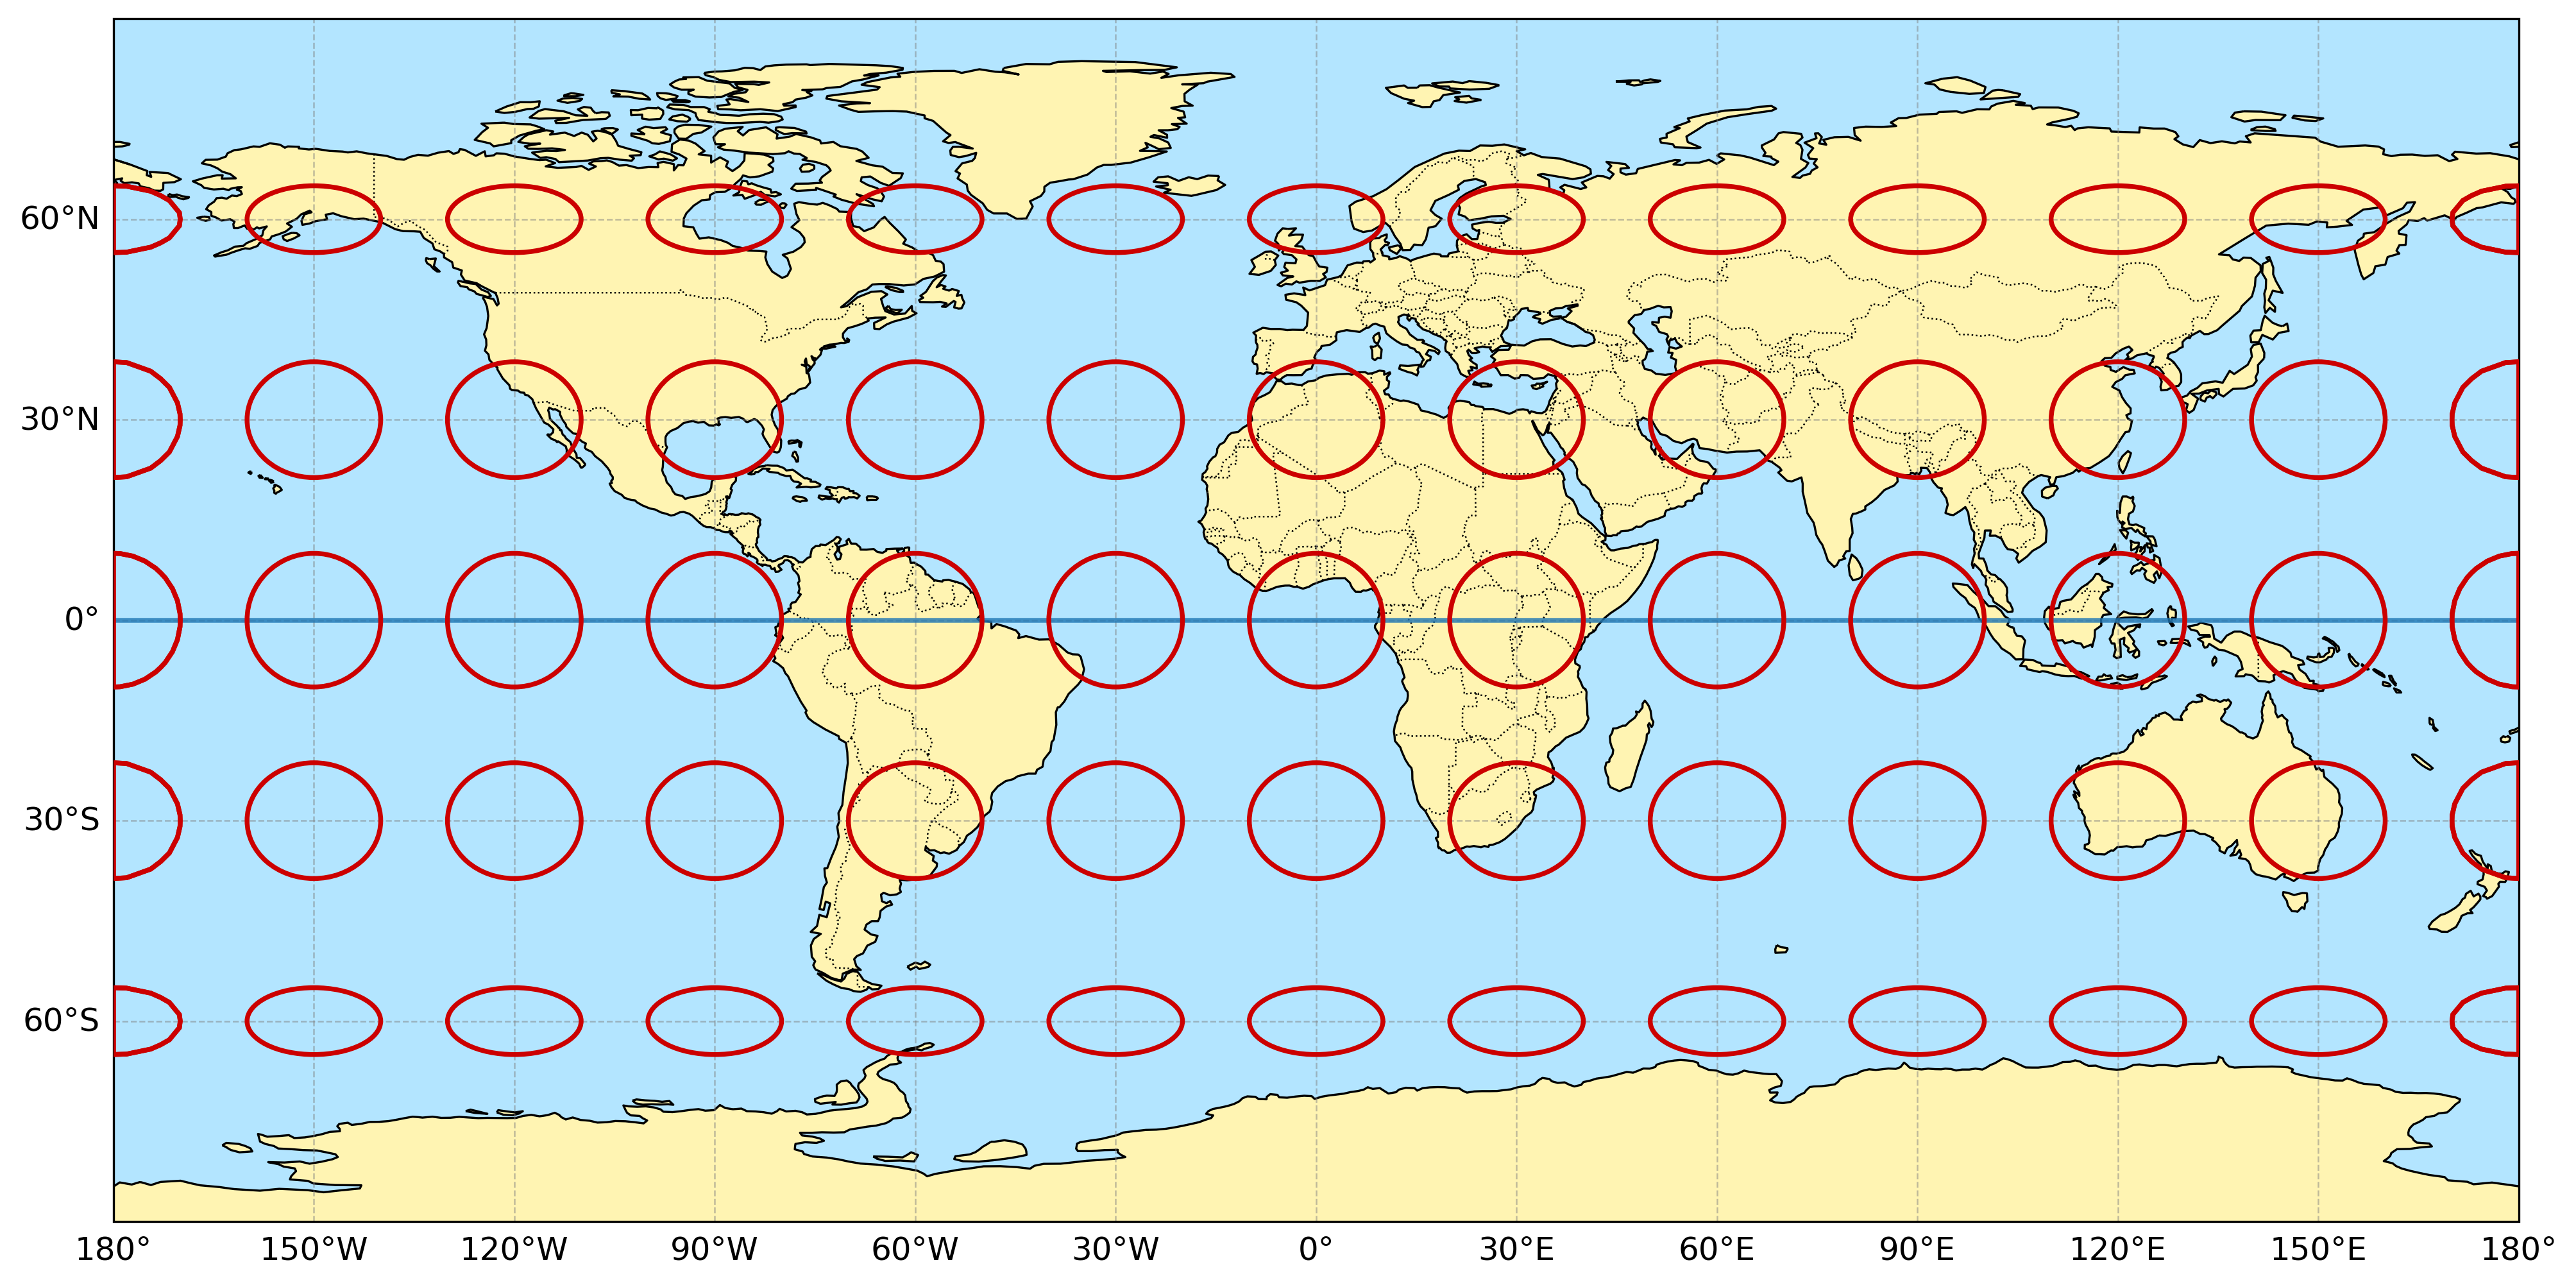

In [1]:
# === INSTALAÇÃO ===
!pip install cartopy matplotlib numpy -q

# === IMPORTS ===
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Ellipse

# === FUNÇÃO: Elipses de Tissot (Círculos de raio fixo na esfera) ===
def tissot_plate_carree(ax, radius_deg=3.0, spacing=30,
                        edgecolor='#cc0000', facecolor='none', alpha=1.0, linewidth=1.8):
    """
    Desenha as Elipses de Tissot (círculos de raio fixo projetados na esfera)
    usando a projeção Plate Carrée.

    width  = 2 * radius_deg            → constante (E-W)
    height = 2 * radius_deg * cos(lat) → comprimido em altas latitudes (N-S)
    → Elipses se alongam HORIZONTALMENTE nos polos.
    """
    # Cria grade de coordenadas
    lons = np.arange(-180, 181, spacing)
    lats = np.arange(-90, 91, spacing)

    for lon in lons:
        for lat in lats:
            width  = 2.0 * radius_deg                       # E-W: constante
            height = 2.0 * radius_deg * np.cos(np.deg2rad(lat))  # N-S: comprimido

            if np.abs(height) < 0.05:  # Evita degeneração nos polos
                continue

            e = Ellipse((lon, lat),
                        width=width, height=height,
                        angle=0.0,
                        edgecolor=edgecolor, facecolor=facecolor,
                        alpha=alpha, linewidth=linewidth,
                        transform=ccrs.PlateCarree(),
                        zorder=6)
            ax.add_patch(e)

# === FIGURA ===
fig = plt.figure(figsize=(14, 8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Fundo
ax.add_feature(cfeature.LAND,   facecolor='#fff4b2')  # amarelo pastel
ax.add_feature(cfeature.OCEAN,  facecolor='#b3e5ff')  # azul claro
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS,   linestyle=':', linewidth=0.6)

# Grade
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 30))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))

# === AJUSTE DO TAMANHO DA FONTE DOS RÓTULOS DE COORDENADAS ===
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# === ELIPSES DESTACADAS (raio de 10° na esfera) ===
tissot_plate_carree(ax, radius_deg=10.0, spacing=30)

# Equador
ax.axhline(0, color='#1f77b4', linewidth=1.8, alpha=0.8, zorder=5)

# Ajustes
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.subplots_adjust(top=0.85)
plt.show()